# Zadanie 4

- Autor: Maciej Rudy (108261)
- Grupa: 2
- Prowadzący: dr inż. BOGDAN RUSZCZAK
- Opis: co chcę pokazać w tym zadaniu
  1. jednozdaniowy opis pierwszego pomysłu
  2. jednozdaniowy opis drugiego pomysłu
  3. jednozdaniowy opis trzeciego pomysłu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle
import plotly.express as px
import seaborn as sns
import math

In [2]:
# połączenie z bazą
connection = cx_Oracle.connect(user="s108261", password="s108261",
                               dsn="217.173.198.135:1521/tpdb")
cursor = connection.cursor()

In [3]:
# wybranie danych z Factories, Safety_measurements, Stock
df1 = pd.read_sql("SELECT * FROM Factories",connection)
df2 = pd.read_sql("SELECT * FROM Safety_measurements",connection)
df3 = pd.read_sql("SELECT * FROM Stock",connection)

In [4]:
# polaczenie danych z tabel w dataframe1, dataframe2, dataframe3
df23 = pd.merge(df2, df3, on='S_MEASURE_ID')
df123 = pd.merge(df23, df1, on='FACTORY_ID')

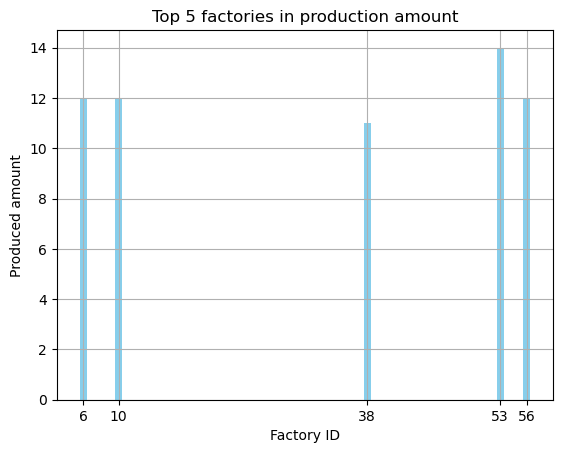

In [5]:
# wizualizacja 1.1 matplotlib
##1 zwizualizowanie zależności pomiędzy fabrykami, pomiarami i wyprodukowanymi samochodami
ProdSum = df123.groupby("FACTORY_ID").size().reset_index(name="Amount")
top5 = ProdSum.nlargest(5, 'Amount')
plt.bar(top5['FACTORY_ID'], top5['Amount'], color='skyblue')
plt.xlabel('Factory ID')
plt.ylabel('Produced amount')
plt.title('Top 5 factories in production amount')
plt.xticks(top5['FACTORY_ID'])
plt.grid()

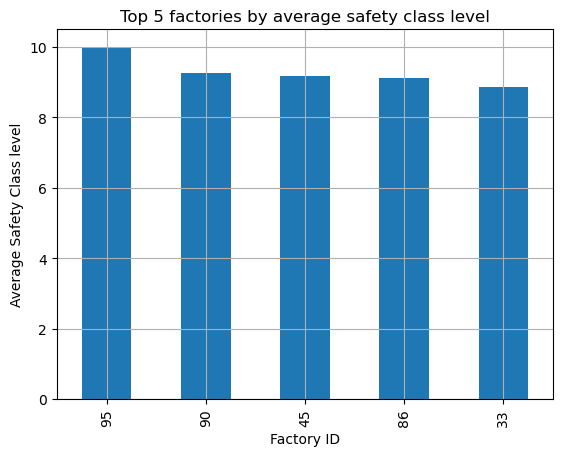

In [6]:
# wizualizacja 1.2 matplotlib
SafetyPlot = df123.groupby("FACTORY_ID")['SAFETY_CLASS'].mean()
Stop5 = SafetyPlot.sort_values(ascending=False).head(5)
Stop5.plot(kind="bar")
plt.xlabel('Factory ID')
plt.ylabel('Average Safety Class level')
plt.title('Top 5 factories by average safety class level')
plt.grid()

In [7]:
# wybranie danych z Suppliers, Parts, SKU, sku_parts
suppTab = pd.read_sql("SELECT * FROM Suppliers",connection)
partsTab = pd.read_sql("SELECT * FROM Parts",connection)
skuTab = pd.read_sql("SELECT * FROM SKU",connection)
skuPartsTab = pd.read_sql("SELECT * FROM sku_parts",connection)
skuSkuParts = pd.merge(skuTab, skuPartsTab, on='SKU_ID')
SKUPARTS = pd.merge(skuSkuParts, partsTab, on='PART_ID')
SKUPARTSSUPP = pd.merge(SKUPARTS, suppTab, on='SUPP_ID')

In [8]:
# wizualizacja 2.1 plotly
##2 wizualizacja zależności pomiędzy typami produktów, kosztami i dostawcami
TopSupp = SKUPARTSSUPP.groupby("SUPP_NAME").size().reset_index(name="Amount")
TopSupp.columns = ['Supplier Name','Amount']
TopSupp = TopSupp.nlargest(4,'Amount')

fig = px.bar(TopSupp, x="Supplier Name", y="Amount",
            title = "Top 4 most recent suppliers") 

colors = ['red', 'green', 'blue', 'purple', 'orange']

fig.update_traces(marker_color=colors)

fig.write_html('TopSupp.html', auto_open=True)


In [9]:
# wizualizacja 2.2 plotly
ExpSKU = SKUPARTSSUPP.groupby("NAME_x")['COST'].sum().reset_index(name='Cost')
ExpSKU.columns = ['SKU Name','SKU Cost']
ExpSKU = ExpSKU.nlargest(10,'SKU Cost').reset_index(drop=True)

fig2 = px.scatter(ExpSKU, x="SKU Name", y="SKU Cost",title = "Top 10 the most expensive producing SKUs")

fig2.write_html('Costs.html', auto_open=True)

In [10]:
# wybranie danych z Salary, Factories, Employees
salaryTab = pd.read_sql("SELECT * FROM Salary",connection)
factoriesTab = pd.read_sql("SELECT * FROM Factories",connection)
employeesTab = pd.read_sql("SELECT * FROM Employees",connection)
comb = pd.merge(salaryTab, factoriesTab, on='FACTORY_ID')
comb = pd.merge(comb, employeesTab, on='EMPLOYEE_ID')

[Text(0.5, 0, 'Countries'),
 Text(0, 0.5, 'Average salary [$]'),
 Text(0.5, 1.0, 'Average salary in countries')]

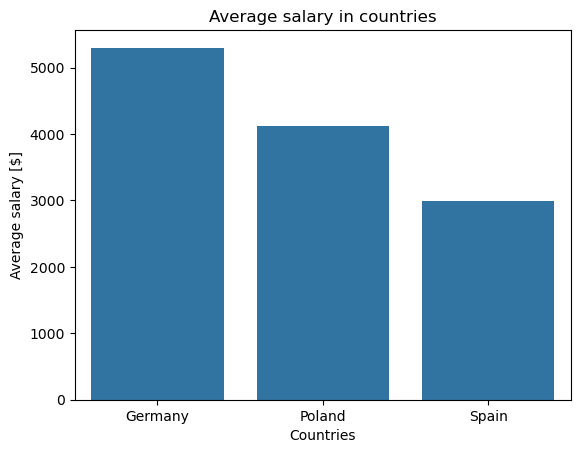

In [11]:
# wizualizacja 3.1 seaborn
##3 wykazanie zależności, statystyk pracowników z różnych fabryk
avgSalary = comb.groupby("COUNTRY")['SALARY'].mean().reset_index(name='Average Salary')

figure3 = sns.barplot(x="COUNTRY", y="Average Salary", data=avgSalary)
figure3.set(xlabel='Countries', ylabel='Average salary [$]', title='Average salary in countries')


([], [])

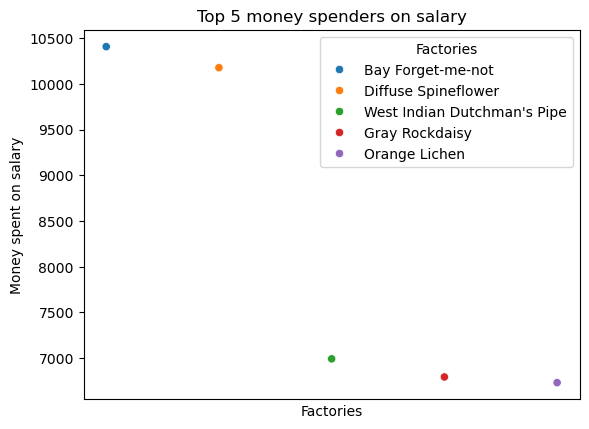

In [12]:
# wizualizacja 3.2 seaborn
positionStats = comb.groupby("NAME_x")['SALARY'].sum().reset_index()
positionStats = positionStats.nlargest(5,'SALARY')
positionStats.columns = ['Factories','Money spent on salary']
#positionStats = positionStats.nlargest(3,'Money spent on salary').reset_index(drop=True)
figure4 = sns.scatterplot(x="Factories", y="Money spent on salary", data=positionStats, hue = 'Factories').set(title='Top 5 money spenders on salary')
sns.set_style("darkgrid", {'grid.linestyle': '--'})
plt.xticks(ticks=[], labels=[])